In [1]:
%%capture
# By these two lines, it will not be needed to restart kernel when applying change in a library
%load_ext autoreload
%autoreload 2

import dolfin  
import numpy    as np
import sympy    as sp
import matplotlib.pyplot as plt
from sympy.plotting import plot
import math
import pickle
from numpy import linspace
from sympy import lambdify
from mpl_toolkits.mplot3d import Axes3D
import os

import myPythonLibrary as mypy
import dolfin_mech     as dmech
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

from scipy.optimize import minimize
from scipy.optimize import fsolve

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import seeds
import geometry

### Homogenized material parameters are computed for three different geometries of Random, Hexagonal, and Circular inclusion

## Parameters

In [2]:
Es = 1
nus = 0.2
mu_s = Es/(1 + nus)/2
lmbda_s = Es*nus/(1 + nus)/(1 - 2*nus)
k_s = 3 * lmbda_s + 2 * mu_s
mat_params = {"model":"CGNH", "parameters":{"E":Es, "nu":nus}}

# Random Geometry

In [3]:
%%capture
lmbda_lst_random =[]
mu_lst_random = []
phi_lst_random = []
kappa_lst_random = []

fname = "Geometries/Hexagon/hexagon_RVE1_voronoi"

domain = 1
row = 3
DoI = 0.4
shift_y = 0
# seeds.semi_regular(DoI, row, domain)

thickness_lst = [0.01, 0.04, 0.06, 0.09, 0.12, 0.15, 0.17]
for i in range(len(thickness_lst)):
    print(thickness_lst[i])
    thickness = thickness_lst[i]
    geometry.voronoi_tessellation(fname, thickness, row, domain, shift_y, seeds_remove = None)
    mesh = dolfin.Mesh()
    dolfin.XDMFFile(fname+"-mesh.xdmf").read(mesh)

    coord = mesh.coordinates()
    xmax = max(coord[:,0]); xmin = min(coord[:,0])
    ymax = max(coord[:,1]); ymin = min(coord[:,1])
    vol = (xmax - xmin)*(ymax - ymin)


    bbox = [xmin, xmax, ymin, ymax]
    

    dV = dolfin.Measure(
        "dx",
        domain=mesh)
    vs0 = dolfin.assemble(dolfin.Constant(1) * dV)


    homog = dmech.HomogenizationLinear(dim=2,
                                mesh=mesh,
                                mat_params=mat_params["parameters"],
                                vol=vol,
                                bbox=bbox)
    [lambda_, mu_] = homog.get_lambda_and_mu()
    kappa_ = homog.get_kappa()

    phi_lst_random.append((vol - vs0)/vol)
    lmbda_lst_random.append(lambda_)
    mu_lst_random.append(mu_)
    kappa_lst_random.append(kappa_)


Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 3618 (Line)
Info    : [ 10%] Meshing curve 3619 (Line)
Info    : [ 10%] Meshing curve 3620 (Line)
Info    : [ 10%] Meshing curve 3902 (Line)
Info    : [ 10%] Meshing curve 3903 (Line)
Info    : [ 10%] Meshing curve 3904 (Line)
Info    : [ 10%] Meshing curve 3905 (Line)
Info    : [ 10%] Meshing curve 3906 (Line)
Info    : [ 10%] Meshing curve 3907 (Line)
Info    : [ 10%] Meshing curve 3908 (Line)
Info    : [ 10%] Meshing curve 3909 (Line)
Info    : [ 10%] Meshing curve 3910 (Line)
Info    : [ 10%] Meshing curve 3911 (Line)
Info    : [ 10%] Meshing curve 3912 (Line)
Info    : [ 10%] Meshing curve 3913 (Line)
Info    : [ 10%] Meshing curve 3914 (Line)
Info    : [ 10%] Meshing curve 3915 (Line)
Info    : [ 10%] Meshing curve 3916 (Line)
Info    : [ 10%] Meshing curve 3917 (Line)
Info    : [ 10%] Meshing curve 3918 (Line)
Info    : [ 10%] Meshing cur

# Haxagon

In [4]:
%%capture
lmbda_lst_hexagon =[]
mu_lst_hexagon = []
phi_lst_hexagon = []
kappa_lst_hexagon = []

fname = "Geometries/Hexagon/hexagon_RVE1"

domain = 1
row = 1
DoI = 0.0
shift_y = 0
seeds.semi_regular(DoI, row, domain)

for h in range(11):
    thickness = (h+0.5)/20
    geometry.voronoi(fname, thickness, row, domain, shift_y, seeds_remove = None)
    mesh = dolfin.Mesh()
    dolfin.XDMFFile(fname+"-mesh.xdmf").read(mesh)

    coord = mesh.coordinates()
    xmax = max(coord[:,0]); xmin = min(coord[:,0])
    ymax = max(coord[:,1]); ymin = min(coord[:,1])
    vol = (xmax - xmin)*(ymax - ymin)

    bbox = [xmin, xmax, ymin, ymax]
    

    dV = dolfin.Measure(
        "dx",
        domain=mesh)
    vs0 = dolfin.assemble(dolfin.Constant(1) * dV)


    homog = dmech.HomogenizationLinear(dim=2,
                                mesh=mesh,
                                mat_params=mat_params["parameters"],
                                vol=vol,
                                bbox=bbox)
    [lambda_, mu_] = homog.get_lambda_and_mu()
    kappa_ = homog.get_kappa()

    phi_lst_hexagon.append((vol - vs0)/vol)
    lmbda_lst_hexagon.append(lambda_)
    mu_lst_hexagon.append(mu_)
    kappa_lst_hexagon.append(kappa_)


Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 122 (Line)
Info    : [ 10%] Meshing curve 123 (Line)
Info    : [ 10%] Meshing curve 124 (Line)
Info    : [ 20%] Meshing curve 152 (Line)
Info    : [ 20%] Meshing curve 153 (Line)
Info    : [ 20%] Meshing curve 154 (Line)
Info    : [ 30%] Meshing curve 155 (Line)
Info    : [ 30%] Meshing curve 156 (Line)
Info    : [ 30%] Meshing curve 157 (Line)
Info    : [ 40%] Meshing curve 158 (Line)
Info    : [ 40%] Meshing curve 159 (Line)
Info    : [ 40%] Meshing curve 160 (Line)
Info    : [ 50%] Meshing curve 161 (Line)
Info    : [ 50%] Meshing curve 162 (Line)
Info    : [ 50%] Meshing curve 163 (Line)
Info    : [ 60%] Meshing curve 164 (Line)
Info    : [ 60%] Meshing curve 165 (Line)
Info    : [ 70%] Meshing curve 166 (Line)
Info    : [ 70%] Meshing curve 167 (Line)
Info    : [ 70%] Meshing curve 168 (Line)
Info    : [ 80%] Meshing curve 169 (Line)
Info  

# Circular inclusion

In [5]:
%%capture
lmbda_lst_rectangle =[]
mu_lst_rectangle = []
phi_lst_rectangle = []
kappa_lst_rectangle = []


width = 1

vol = math.sqrt(3)*width**2



shift_x = 0
shift_y = 0

fname = 'Geometries/Hallow_square/Hex_rectangle'


for phi in range(1,90,2):
    porosity = phi/100
    r = math.sqrt(porosity*vol/math.pi/2)
    geometry.Hex_rectangle(fname, width, r, shift_x, shift_y)
    mesh = dolfin.Mesh()
    dolfin.XDMFFile(fname+"-mesh.xdmf").read(mesh)
    

    coord = mesh.coordinates()
    xmax = max(coord[:,0]); xmin = min(coord[:,0])
    ymax = max(coord[:,1]); ymin = min(coord[:,1])
    vol = (xmax - xmin)*(ymax - ymin)

    bbox = [xmin, xmax, ymin, ymax]
    

    dV = dolfin.Measure(
        "dx",
        domain=mesh)
    vs0 = dolfin.assemble(dolfin.Constant(1) * dV)


    homog = dmech.HomogenizationLinear(dim=2,
                                mesh=mesh,
                                mat_params=mat_params["parameters"],
                                vol=vol,
                                bbox=bbox)
    [lambda_, mu_] = homog.get_lambda_and_mu()
    kappa_ = homog.get_kappa()

    phi_lst_rectangle.append((vol - vs0)/vol)
    lmbda_lst_rectangle.append(lambda_)
    mu_lst_rectangle.append(mu_)
    kappa_lst_rectangle.append(kappa_)


Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Ellipse)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Ellipse)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Ellipse)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Ellipse)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Ellipse)
Info    : Done meshing 1D (Wall 0.00132517s, CPU 0.001856s)
Info    : Meshing 2D...
Info    : Meshing surface 8 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.238287s, CPU 0.148699s)
Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 4.8598e-05s, CPU 7e-06s)
Info    : 3525 nodes 7059 elements
Info    : Writing 'Geometries/Hallow_square/Hex_rectangle.msh'...
Info    : Done writing 'Geometries/Hallow_square/Hex_rectangle.msh'
Info    : Running '/Users/tayebi/miniconda3/envs/all/lib/python3.7/

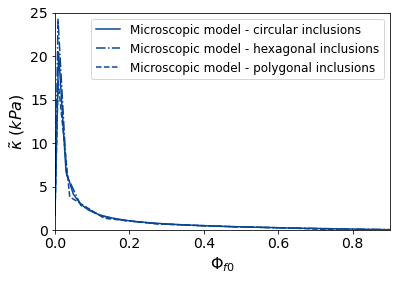

In [10]:
phi_dil = np.linspace(min(phi_lst_hexagon),4*mu_s/(4*mu_s + 3*k_s),100)
k_dil_norm = (1 - phi_dil*(1 + 3*k_s/4/mu_s))
plt.figure()

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)
plt.xlabel(r'$\Phi_{f0}$', fontsize = 16)
plt.ylabel(r'$\tilde{\kappa}~(kPa)$', fontsize = 16)
# plt.plot(eps_glob, sigma_glob, 'r')
plt.plot(phi_lst_rectangle, kappa_lst_rectangle, '#084594')
plt.plot(phi_lst_hexagon, kappa_lst_hexagon, '#084594', linestyle='dashdot')
plt.plot(phi_lst_random, kappa_lst_random, '#084594', linestyle='dashed')


plt.xlim(0, 0.9)
plt.ylim(0, 25)
plt.legend([ 'Microscopic model - circular inclusions', 'Microscopic model - hexagonal inclusions', 'Microscopic model - polygonal inclusions'])


plt.savefig('homogenized-bulk-modulus.pdf',bbox_inches='tight')
plt.show()

In [6]:
k_lst_random = []
k_lst_hexagon = []
k_lst_rectangle = []

phi_lst_random.insert(0, 1.0)
mu_lst_random.insert(0, 0.0)
lmbda_lst_random.insert(0, 0.0)
kappa_lst_random.insert(0, 0.0)
phi_lst_random.append(0)
mu_lst_random.append(mu_s)
lmbda_lst_random.append(lmbda_s)
kappa_lst_random.append(k_s)
for i in range (len(phi_lst_random)):
    k_lst_random.append(3*lmbda_lst_random[i] + 2*mu_lst_random[i])

phi_lst_hexagon.insert(0, 1.0)
mu_lst_hexagon.insert(0, 0.0)
lmbda_lst_hexagon.insert(0, 0.0)
kappa_lst_hexagon.insert(0, 0.0)
phi_lst_hexagon.append(0)
mu_lst_hexagon.append(mu_s)
lmbda_lst_hexagon.append(lmbda_s)
kappa_lst_hexagon.append(k_s)
for i in range (len(phi_lst_hexagon)):
    k_lst_hexagon.append(3*lmbda_lst_hexagon[i] + 2*mu_lst_hexagon[i])

phi_lst_rectangle.insert(0, 0.)
phi_lst_rectangle.append(1.0)
mu_lst_rectangle.insert(0, mu_s)
lmbda_lst_rectangle.insert(0, lmbda_s)
kappa_lst_rectangle.insert(0, k_s)
mu_lst_rectangle.append(0.)
lmbda_lst_rectangle.append(0.)
kappa_lst_rectangle.append(0)
for i in range (len(phi_lst_rectangle)):
    k_lst_rectangle.append(3*lmbda_lst_rectangle[i] + 2*mu_lst_rectangle[i])



### Obtaining homogenized parameters from Dilute and Differential scheme by Dormieux Microporomechanics

In [7]:
def Eq1(mu_hom, phi):
    return ((1+4*mu_s/(3*k_s))*(mu_hom/mu_s)**3)/(2 - (1 - 4*mu_s/(3*k_s))*(mu_hom/mu_s)**(3/5)) - (1 - phi)**6

def Eq2(mu_hom, k_hom):
    return mu_hom/mu_s - ((-4/3*mu_hom/k_hom + 1)**(5/3))/((-4/3*mu_s/k_s + 1)**(5/3))

def Differential_scheme(phi_0):
    h = 10e-6
    mu_hom = mu_s
    k_hom = k_s
    res = 1
    while (res > 10e-7):
        res = Eq1(mu_hom, phi_0)
        jac = (Eq1(mu_hom + h, phi_0) - Eq1(mu_hom, phi_0))/h
        delta = - res/jac
        mu_hom = mu_hom + delta

    res = 1
    while (res > 10e-7):
        res = Eq2(mu_hom, k_hom)
        jac = (Eq2(mu_hom, k_hom + h) - Eq2(mu_hom, k_hom))/h
        delta = - res/jac
        k_hom = k_hom + delta

    return mu_hom, k_hom

def k_diff_func(mu_hom):
    return 4/3*mu_hom/(1 - (mu_hom/mu_s)**(3/5)*(1 - 4/3*mu_s/k_s))

In [8]:
mu_diff = []
k_diff = []
mu_dil = []
k_dil = []
for i in range(len(phi_lst_hexagon)):
    mu_ = Differential_scheme(phi_lst_hexagon[i])[0]
    mu_diff.append(mu_)
    k_diff.append(k_diff_func(mu_))
    mu_dil.append(mu_s*(1 - 5*phi_lst_hexagon[i]*(3*k_s + 4*mu_s)/(9*k_s + 8*mu_s)))
    k_dil.append(k_s*(1 - phi_lst_hexagon[i]*(1 + 3*k_s/4/mu_s)))


## Normalizing the homogenized parameters

In [9]:
mu_lst_hexagon_norm = []
kappa_lst_hexagon_norm = []
mu_diff_norm = []
mu_dil_norm = []
k_lst_hexagon_norm = []
k_diff_norm = []
k_dil_norm = []

mu_lst_norm_random = []
k_lst_norm_random = []
kappa_lst_norm_random = []

mu_lst_norm_rectangle = []
k_lst_norm_rectangle = []
kappa_lst_norm_rectangle = []

for i in range (len(mu_lst_hexagon)):
    mu_lst_hexagon_norm.append(mu_lst_hexagon[i]/mu_s)
    mu_dil_norm.append(mu_dil[i]/mu_s)
    mu_diff_norm.append(mu_diff[i]/mu_s)
    k_lst_hexagon_norm.append(k_lst_hexagon[i]/k_s)
    k_diff_norm.append(k_diff[i]/k_s)
    k_dil_norm.append(k_dil[i]/k_s)
    kappa_lst_hexagon_norm.append(kappa_lst_hexagon[i]/k_s)


for i in range (len(mu_lst_random)):
    mu_lst_norm_random.append(mu_lst_random[i]/mu_s)
    k_lst_norm_random.append(k_lst_random[i]/k_s)
    kappa_lst_norm_random.append(kappa_lst_random[i]/k_s)


for i in range (len(mu_lst_rectangle)):
    mu_lst_norm_rectangle.append(mu_lst_rectangle[i]/mu_s)
    k_lst_norm_rectangle.append(k_lst_rectangle[i]/k_s)
    kappa_lst_norm_rectangle.append(kappa_lst_rectangle[i]/k_s)

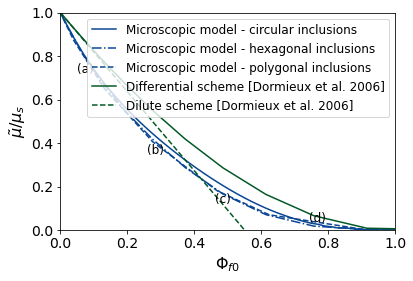

In [11]:
phi_dil = np.linspace(min(phi_lst_hexagon),(9*k_s + 8*mu_s)/(3*k_s + 4*mu_s)/5,100)
mu_dil_norm = 1 - 5*phi_dil*(3*k_s + 4*mu_s)/(9*k_s + 8*mu_s)
plt.figure()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)
plt.xlabel(r'$\Phi_{f0}$', fontsize=16)
plt.ylabel(r'$\tilde{\mu}/\mu_s$', fontsize=16)
# plt.plot(eps_glob, sigma_glob, 'r')
plt.plot(phi_lst_rectangle, mu_lst_norm_rectangle, '#084594')
plt.plot(phi_lst_hexagon, mu_lst_hexagon_norm, '#084594', linestyle='dashdot')
plt.plot(phi_lst_random, mu_lst_norm_random, '#084594', linestyle='dashed')
plt.plot(phi_lst_hexagon, mu_diff_norm, '#005824')
plt.plot(phi_dil, mu_dil_norm, '#005824', linestyle='dashed')
# plt.plot(phi_lst[2:], mu_dor_lin_norm[2:], '#E31A1C')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(['Microscopic model - circular inclusions', 'Microscopic model - hexagonal inclusions', 'Microscopic model - polygonal inclusions', 'Differential scheme [Dormieux et al. 2006]', 'Dilute scheme [Dormieux et al. 2006]'])
# plt.scatter(phi_lst_hexagon, mu_lst_hexagon_norm)
plt.text(phi_lst_hexagon[9]-0.02, mu_lst_hexagon_norm[9]-0.08, '(a)',fontsize=12)
plt.text(phi_lst_hexagon[6]-0.015, mu_lst_hexagon_norm[6]-0.07, '(b)',fontsize=12)
plt.text(phi_lst_hexagon[4]-0.025, mu_lst_hexagon_norm[4]-0.04, '(c)',fontsize=12)
plt.text(phi_lst_hexagon[2]-0.015, mu_lst_hexagon_norm[2]+0.02, '(d)',fontsize=12)

plt.savefig('linear_Dormieux_mu.pdf',bbox_inches='tight')
plt.show()

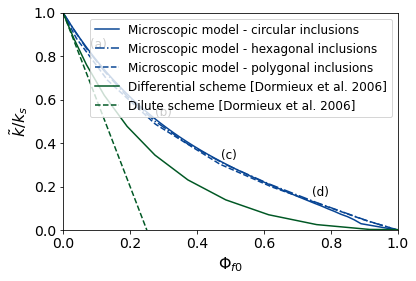

In [12]:
phi_dil = np.linspace(min(phi_lst_hexagon),4*mu_s/(4*mu_s + 3*k_s),100)
k_dil_norm = (1 - phi_dil*(1 + 3*k_s/4/mu_s))
plt.figure()

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=12)
plt.xlabel(r'$\Phi_{f0}$', fontsize = 16)
plt.ylabel(r'$\tilde{k}/k_s$', fontsize = 16)
# plt.plot(eps_glob, sigma_glob, 'r')
plt.plot(phi_lst_rectangle, k_lst_norm_rectangle, '#084594')
plt.plot(phi_lst_hexagon, k_lst_hexagon_norm, '#084594', linestyle='dashdot')
plt.plot(phi_lst_random, k_lst_norm_random, '#084594', linestyle='dashed')
plt.plot(phi_lst_hexagon, k_diff_norm, '#005824')
plt.plot(phi_dil, k_dil_norm, '#005824', linestyle='dashed')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(['Microscopic model - circular inclusions', 'Microscopic model - hexagonal inclusions', 'Microscopic model - polygonal inclusions', 'Differential scheme [Dormieux et al. 2006]', 'Dilute scheme [Dormieux et al. 2006]'])

# plt.scatter(phi_lst_hexagon, k_lst_hexagon_norm)
plt.text(phi_lst_hexagon[9]+0.01, k_lst_hexagon_norm[9], '(a)',fontsize=12)
plt.text(phi_lst_hexagon[6], k_lst_hexagon_norm[6]+0.025, '(b)',fontsize=12)
plt.text(phi_lst_hexagon[4]-0.015, k_lst_hexagon_norm[4]+0.025, '(c)',fontsize=12)
plt.text(phi_lst_hexagon[2]-0.015, k_lst_hexagon_norm[2]+0.03, '(d)',fontsize=12)
plt.savefig('linear_Dormieux_k.pdf',bbox_inches='tight')
plt.show()
